In [1]:
# # This code allows to output more than one variable value without using a print statement.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# # Default
# # InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
# Version Check
import sys
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import pandas as pd
import numpy as np
import scipy
print("python", sys.version)
print("tensorflow", tf.__version__)
print("tensorflow-datasets", tfds.__version__)
print("Pillow", PIL.__version__)
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("scipy", scipy.__version__)
print()
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())

python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.6.2
tensorflow-datasets 4.4.0
Pillow 8.3.2
pandas 1.3.3
numpy 1.19.5
scipy 1.7.1

Num GPUs Available: 1
Built with CUDA: True
Built with GPU support: True


## Custom Loss

In [3]:
# Generate sample data
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model
model = Sequential([
    Dense(units=1, input_shape=[1])
])

# Custom loss (Huber Loss)
def custom_huber_loss(y_true, y_pred):
    
    threshold = 1
    error = y_true - y_pred
    small = tf.abs(error) <= threshold
    
    # l2 loss
    small_error = tf.square(error) / 2
    
    # l1 loss
    big_error = threshold * (tf.abs(error) - (threshold / 2))
    
    # return
    return tf.where(small, small_error, big_error)

# Compile
model.compile(optimizer='sgd', loss=custom_huber_loss)

# Fit
history = model.fit(x, y, epochs=1000, verbose=0)

In [4]:
# Predict
model.predict([6])

array([[14.094829]], dtype=float32)

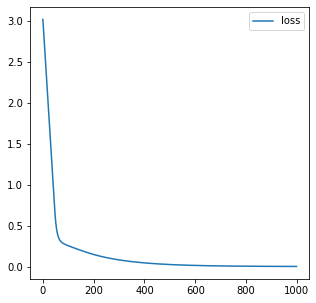

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(history.history['loss'], label='loss')
ax.legend()
plt.show()

## Custom Layer

In [6]:
from tensorflow.keras.layers import Layer

class MyDense(Layer):
    def __init__(self, units=32, input_shape=None):
        super(MyDense, self).__init__(input_shape=input_shape)
        self.units=units
        
    def build(self, input_shape):
        # initialize weight 
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name='weight', 
                             initial_value=w_init(shape=(input_shape[-1], self.units), dtype='float32'),
                             trainable=True)
        # initialize bias
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name='bias', 
                             initial_value=b_init(shape=(self.units), dtype='float32'), 
                             trainable=True)
        
    def call(self, inputs):
        # wx + b
        return tf.matmul(inputs, self.w) + self.b

In [7]:
# Generate sample data
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([2, 4, 6, 8, 10], dtype=float)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model
model = Sequential([
    MyDense(units=1, input_shape=[1])
])

# Compile
model.compile(optimizer='sgd', loss='mse')

# Fit
history = model.fit(x, y, epochs=1000, verbose=0)

In [8]:
# Predict
model.predict([6])

array([[14.003152]], dtype=float32)

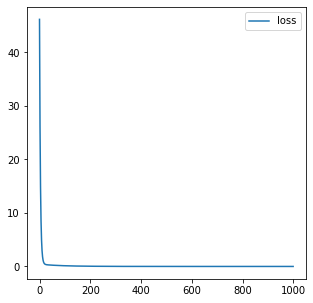

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(history.history['loss'], label='loss')
ax.legend()
plt.show()

## Custom Fit

### train_on_batch

In [10]:
# Load Data / Normalizaion
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [11]:
def get_batches(x, y, batch_size=32):
    for i in range(int(x.shape[0] // batch_size)):
        x_batch = x[i * batch_size:(i + 1) * batch_size]
        y_batch = y[i * batch_size:(i + 1) * batch_size]
        yield(np.asarray(x_batch), np.asarray(y_batch))

In [12]:
x, y = next(get_batches(x_train, y_train))
x.shape, y.shape

((32, 28, 28), (32,))

epoch: 1, batch:  50, batch_loss: 0.4350, batch_accuracy: 0.8359, avg_loss: 1.0281
epoch: 1, batch: 100, batch_loss: 0.3909, batch_accuracy: 0.9062, avg_loss: 0.7175
epoch: 1, batch: 150, batch_loss: 0.2669, batch_accuracy: 0.9219, avg_loss: 0.5921
epoch: 1, batch: 200, batch_loss: 0.2551, batch_accuracy: 0.9219, avg_loss: 0.5079
epoch: 1, batch: 250, batch_loss: 0.2115, batch_accuracy: 0.9219, avg_loss: 0.4565
epoch: 1, batch: 300, batch_loss: 0.2927, batch_accuracy: 0.9297, avg_loss: 0.4165
epoch: 1, batch: 350, batch_loss: 0.1215, batch_accuracy: 0.9609, avg_loss: 0.3878
epoch: 1, batch: 400, batch_loss: 0.1153, batch_accuracy: 0.9688, avg_loss: 0.3670
epoch: 1, batch: 450, batch_loss: 0.1188, batch_accuracy: 0.9609, avg_loss: 0.3441


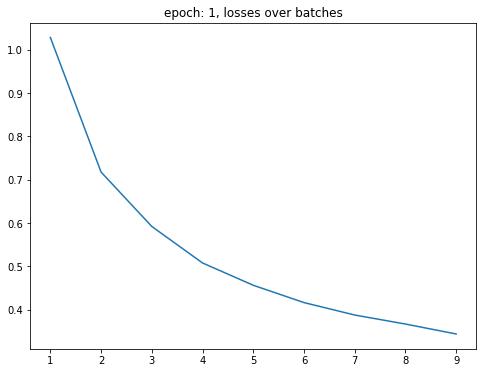

313/313 [==============================] - 1s 2ms/step - loss: 0.1525 - acc: 0.9548
epoch: 1, val_loss: 0.1525, val_acc: 0.9548

epoch: 2, batch:  50, batch_loss: 0.0827, batch_accuracy: 0.9844, avg_loss: 0.1342
epoch: 2, batch: 100, batch_loss: 0.2012, batch_accuracy: 0.9453, avg_loss: 0.1485
epoch: 2, batch: 150, batch_loss: 0.1412, batch_accuracy: 0.9531, avg_loss: 0.1477
epoch: 2, batch: 200, batch_loss: 0.2342, batch_accuracy: 0.9453, avg_loss: 0.1425
epoch: 2, batch: 250, batch_loss: 0.0975, batch_accuracy: 0.9766, avg_loss: 0.1400
epoch: 2, batch: 300, batch_loss: 0.1826, batch_accuracy: 0.9453, avg_loss: 0.1372
epoch: 2, batch: 350, batch_loss: 0.0668, batch_accuracy: 0.9844, avg_loss: 0.1345
epoch: 2, batch: 400, batch_loss: 0.0806, batch_accuracy: 0.9844, avg_loss: 0.1347
epoch: 2, batch: 450, batch_loss: 0.0587, batch_accuracy: 0.9922, avg_loss: 0.1308


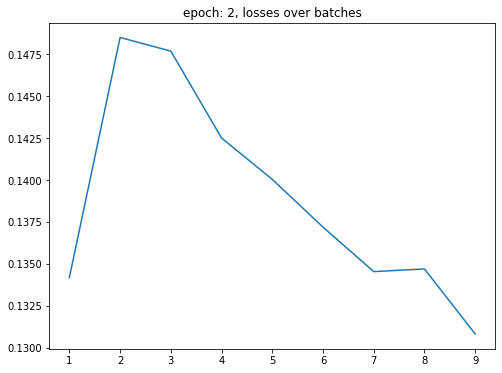

313/313 [==============================] - 1s 2ms/step - loss: 0.1191 - acc: 0.9630
epoch: 2, val_loss: 0.1191, val_acc: 0.9630

epoch: 3, batch:  50, batch_loss: 0.0512, batch_accuracy: 0.9922, avg_loss: 0.0849
epoch: 3, batch: 100, batch_loss: 0.0957, batch_accuracy: 0.9844, avg_loss: 0.0922
epoch: 3, batch: 150, batch_loss: 0.1071, batch_accuracy: 0.9609, avg_loss: 0.0908
epoch: 3, batch: 200, batch_loss: 0.1870, batch_accuracy: 0.9609, avg_loss: 0.0893
epoch: 3, batch: 250, batch_loss: 0.0649, batch_accuracy: 0.9922, avg_loss: 0.0897
epoch: 3, batch: 300, batch_loss: 0.1453, batch_accuracy: 0.9531, avg_loss: 0.0889
epoch: 3, batch: 350, batch_loss: 0.0391, batch_accuracy: 0.9922, avg_loss: 0.0876
epoch: 3, batch: 400, batch_loss: 0.0714, batch_accuracy: 0.9766, avg_loss: 0.0877
epoch: 3, batch: 450, batch_loss: 0.0295, batch_accuracy: 0.9922, avg_loss: 0.0853


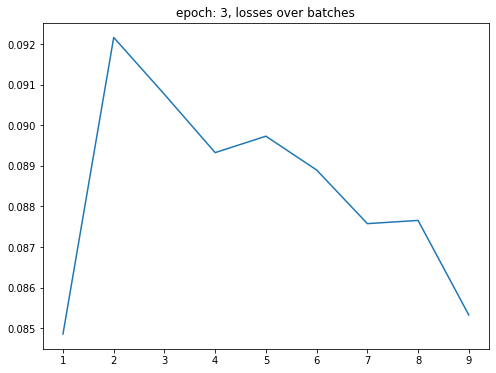

313/313 [==============================] - 1s 2ms/step - loss: 0.1309 - acc: 0.9575
epoch: 3, val_loss: 0.1309, val_acc: 0.9575



In [13]:
MONITOR_STEP = 50

for epoch in range(1, 4):
    batch = 1
    total_loss = 0
    losses = []
    
    for x, y in get_batches(x_train, y_train, batch_size=128):
        loss, acc = model.train_on_batch(x, y)
        total_loss += loss
        
        if batch % MONITOR_STEP == 0:
            losses.append(total_loss / batch)
            print(f'epoch: {epoch}, batch: {batch:3}, batch_loss: {loss:0.4f}, batch_accuracy: {acc:0.4f}, avg_loss: {total_loss / batch:0.4f}')
        batch += 1
        
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, batch // MONITOR_STEP+1), losses)
    plt.title(f'epoch: {epoch}, losses over batches')
    plt.show()
    
    loss, acc = model.evaluate(x_test, y_test)
    print(f'epoch: {epoch}, val_loss: {loss:0.4f}, val_acc: {acc:0.4f}')
    print()

### GradientTape (automatic diffrentiation)

In [14]:
a = tf.Variable([1, 2, 3, 4, 5], dtype=tf.float32)
b = tf.Variable([10, 20, 30, 40, 50], dtype=tf.float32)

print(f'a.trainable: {a.trainable}') 
print(f'b.trainable: {b.trainable}')

a.trainable: True
b.trainable: True


In [15]:
# c = a * b
# partial differentian c/a -> b
# partial differentian c/b -> a
with tf.GradientTape() as tape:
    c = a * b
grads = tape.gradient(c, [a, b])
tf.print(f'dc/da: {grads[0]}')
tf.print(f'dc/db: {grads[1]}')

dc/da: [10. 20. 30. 40. 50.]
dc/db: [1. 2. 3. 4. 5.]


In [16]:
x = tf.Variable(np.random.normal(size=(100,)), dtype=tf.float32)
y = 2 * x + 3
print(f'x[:5]: {x[:5].numpy()}')
print(f'y[:5]: {y[:5].numpy()}')

x[:5]: [ 0.7247703   0.22340381  0.8612295  -0.8638554  -1.8889452 ]
y[:5]: [ 4.4495406   3.4468076   4.722459    1.2722892  -0.77789044]


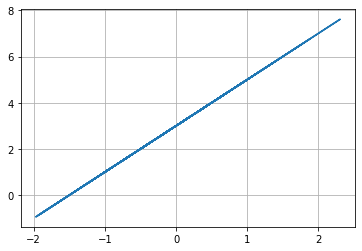

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x.numpy(), y.numpy())
ax.grid()
plt.show()

In [18]:
learning_rate = 0.25
EPOCHS = 100

w = tf.Variable(0.0)
b = tf.Variable(0.0)

for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
        y_hat = w * x + b
        loss = tf.reduce_mean((y_hat-y)**2)
    dw, db = tape.gradient(loss, [w, b])
    
    w = tf.Variable(w - learning_rate * dw)
    b = tf.Variable(b - learning_rate * db)
    
    print(f'epoch: {epoch}, loss: {loss.numpy():7.4f}, w: {w.numpy():0.4f}, b: {b.numpy():0.4f}')
    
    if loss.numpy() < 0.0005:
        break

epoch: 0, loss: 12.2344, w: 0.7731, b: 1.5237
epoch: 1, loss:  3.3756, w: 1.2430, b: 2.2764
epoch: 2, loss:  0.9722, w: 1.5308, b: 2.6471
epoch: 3, loss:  0.2948, w: 1.7080, b: 2.8291
epoch: 4, loss:  0.0945, w: 1.8177, b: 2.9180
epoch: 5, loss:  0.0319, w: 1.8859, b: 2.9612
epoch: 6, loss:  0.0113, w: 1.9284, b: 2.9819
epoch: 7, loss:  0.0042, w: 1.9550, b: 2.9918
epoch: 8, loss:  0.0016, w: 1.9717, b: 2.9964
epoch: 9, loss:  0.0006, w: 1.9822, b: 2.9986
epoch: 10, loss:  0.0002, w: 1.9888, b: 2.9995


### GradientTape (fit w/ automatic diffrentiation)

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [20]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [21]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_acc')
valid_loss = tf.keras.metrics.Mean(name='valid_loss')
valid_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='valid_acc')

In [22]:
def get_batches(x, y, batch_size=32):
    for i in range(int(x.shape[0] // batch_size)):
        x_batch = x[i * batch_size:(i + 1) * batch_size]
        y_batch = y[i * batch_size:(i + 1) * batch_size]
        yield(np.asarray(x_batch), np.asarray(y_batch))

In [23]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        prediction = model(images, training=True)
        loss = loss_function(labels, prediction)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        train_loss(loss)
        train_acc(labels, prediction)
        
@tf.function
def valid_step(images, labels):
    prediction = model(images, training=False)
    loss = loss_function(labels, prediction)
    valid_loss(loss)
    valid_acc(labels, prediction)

In [24]:
train_loss.reset_states()
train_acc.reset_states()
valid_loss.reset_states()
valid_acc.reset_states()

for epoch in range(5):
    for images, labels in get_batches(x_train, y_train):
        train_step(images, labels)
        
    for images, labels in get_batches(x_test, y_test):
        valid_step(images, labels)
        
    metric_template = 'epoch: {}, loss: {:0.4f}, acc: {:0.4f}, val_loss: {:0.4f}, val_acc: {:0.4f}'
    print(metric_template.format(epoch+1, train_loss.result(), train_acc.result(), valid_loss.result(), valid_acc.result()))

epoch: 1, loss: 0.2430, acc: 0.9287, val_loss: 0.1412, val_acc: 0.9568
epoch: 2, loss: 0.1718, acc: 0.9492, val_loss: 0.1262, val_acc: 0.9621
epoch: 3, loss: 0.1369, acc: 0.9593, val_loss: 0.1214, val_acc: 0.9635
epoch: 4, loss: 0.1148, acc: 0.9657, val_loss: 0.1131, val_acc: 0.9664
epoch: 5, loss: 0.0995, acc: 0.9701, val_loss: 0.1217, val_acc: 0.9653
